
# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_marketing_v2 = pd.read_csv('../lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
df_marketing_v2

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
df_marketing_v2.columns = df_marketing_v2.columns.str.replace(" ","_")
df_marketing_v2.columns = df_marketing_v2.columns.str.strip()
df_marketing_v2.columns = df_marketing_v2.columns.str.lower()

In [4]:
df_marketing_v2.isna().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [5]:
df_marketing_v2 = df_marketing_v2.dropna()

In [6]:
df_marketing_v2.isna().sum()

unnamed:_0                       0
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [7]:
df_marketing_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     4543 non-null   int64  
 1   customer                       4543 non-null   object 
 2   state                          4543 non-null   object 
 3   customer_lifetime_value        4543 non-null   float64
 4   response                       4543 non-null   object 
 5   coverage                       4543 non-null   object 
 6   education                      4543 non-null   object 
 7   effective_to_date              4543 non-null   object 
 8   employmentstatus               4543 non-null   object 
 9   gender                         4543 non-null   object 
 10  income                         4543 non-null   int64  
 11  location_code                  4543 non-null   object 
 12  marital_status                 4543 non-null   

In [8]:
df_marketing_v2.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,5540.241250,8033.714059,37453.033238,93.773278,15.111820,48.153863,0.386309,2.980189,436.477525
std,3149.146534,6959.529443,30257.399536,35.093661,10.157925,28.146904,0.907553,2.390362,295.026990
min,2.000000,1904.000852,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2884.000000,4039.089902,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,265.686145
50%,5549.000000,5846.520588,34455.000000,83.000000,14.000000,47.000000,0.000000,2.000000,384.000000
75%,8283.000000,8936.596938,61560.000000,110.000000,23.000000,72.000000,0.000000,4.000000,552.000000
max,10908.000000,83325.381190,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
df_marketing_v2.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed:_0,4543.0,5540.241250,3149.146534,2.000000,2884.000000,5549.000000,8283.000000,10908.000000
customer_lifetime_value,4543.0,8033.714059,6959.529443,1904.000852,4039.089902,5846.520588,8936.596938,83325.381190
income,4543.0,37453.033238,30257.399536,0.000000,0.000000,34455.000000,61560.000000,99961.000000
monthly_premium_auto,4543.0,93.773278,35.093661,61.000000,69.000000,83.000000,110.000000,298.000000
months_since_last_claim,4543.0,15.111820,10.157925,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,4543.0,48.153863,28.146904,0.000000,24.000000,47.000000,72.000000,99.000000
number_of_open_complaints,4543.0,0.386309,0.907553,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,4543.0,2.980189,2.390362,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,4543.0,436.477525,295.026990,0.099007,265.686145,384.000000,552.000000,2893.239678


In [10]:
df_marketing_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     4543 non-null   int64  
 1   customer                       4543 non-null   object 
 2   state                          4543 non-null   object 
 3   customer_lifetime_value        4543 non-null   float64
 4   response                       4543 non-null   object 
 5   coverage                       4543 non-null   object 
 6   education                      4543 non-null   object 
 7   effective_to_date              4543 non-null   object 
 8   employmentstatus               4543 non-null   object 
 9   gender                         4543 non-null   object 
 10  income                         4543 non-null   int64  
 11  location_code                  4543 non-null   object 
 12  marital_status                 4543 non-null   

In [11]:
df_marketing_v2

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [23]:
#filter
data = df_marketing_v2[(df_marketing_v2['response'] == 'Yes') | (df_marketing_v2['response'] == 'No')]
#data[() & ()] #and, 2 filters
#data[() | ()] #or, 2 filters
data

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


<AxesSubplot:xlabel='response', ylabel='count'>

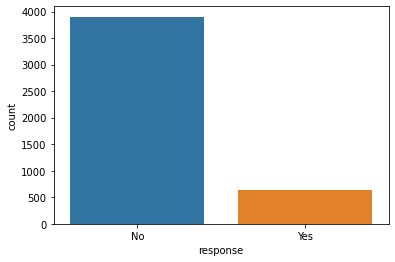

In [36]:
#Show a plot of the total number of responses.
sns.countplot(data=df_marketing_v2, x = 'response')

In [55]:
data2 = df_marketing_v2[(df_marketing_v2['sales_channel'] == 'Agent') | (df_marketing_v2['sales_channel'] == 'Web') | (df_marketing_v2['sales_channel'] == 'Branch') | (df_marketing_v2['sales_channel'] == 'Call Center')]
#data2[() & ()] #and, 2 filters
#data2[() | ()] #or, 2 filters
data2

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


<AxesSubplot:xlabel='sales_channel', ylabel='count'>

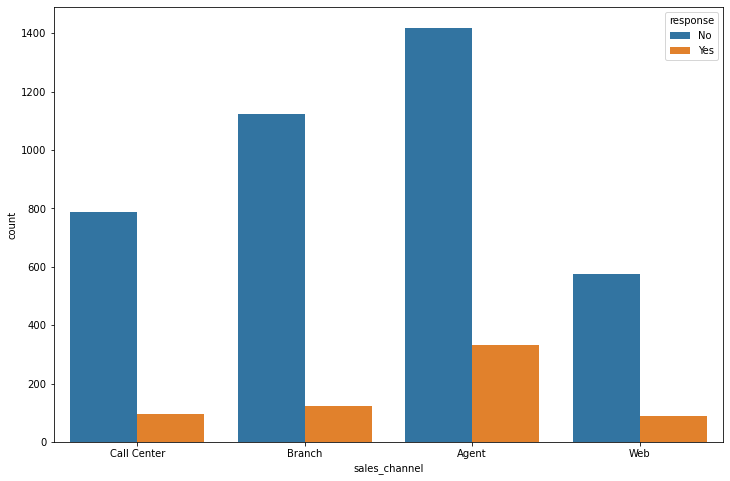

In [63]:
#Show a plot of the response rate by the sales channel.
plt.figure(figsize=(12,8))
sns.countplot('sales_channel', hue='response', data=data2)

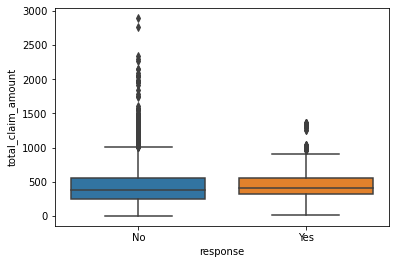

In [30]:
#Show a plot of the response rate by the total claim amount.
sns.boxplot(x='response', y='total_claim_amount', data=df_marketing_v2)
plt.show()

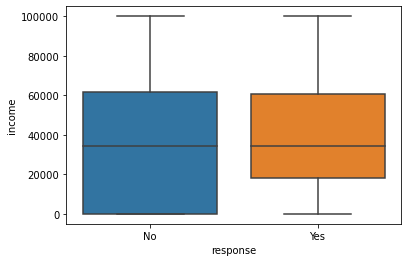

In [28]:
#Show a plot of the response rate by income.
sns.boxplot(x='response', y='income', data=df_marketing_v2)
plt.show()

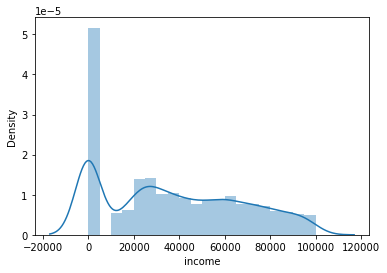

In [52]:
#test
sns.distplot(data['income'], bins=20)
plt.show()